In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import glob

import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
import json

In [2]:
def remove_characters(text: str) -> str:
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def get_text_files(path: str, N=0, shuffle=False) -> list:
    text_files = glob.glob(f"{path}/*.txt")
    if shuffle:
        random.shuffle(text_files)
    if N > 0:
        text_files = text_files[:N]
    return text_files

def get_text(text_files: list) -> list:
    text = []
    for text_file in text_files:
        with open(text_file, 'r', errors='ignore') as f:
            content = remove_characters(f.read())
            content = content.lower()
            text.append(content)
    return text

def tokenization(text):
    if type(text) == list:
        return [word_tokenize(t) for t in text]
    elif type(text) == str:
        return word_tokenize(text)
    return None

In [3]:
# Obtain raw data of N documents and tokenize
N = 15
directory = "../Assignment1/nasa"
text_files = get_text_files(directory, N=N, shuffle=False)
text = get_text(text_files)
tokenized_text = tokenization(text)
print(tokenized_text)

[['miniature', 'electronic', 'temperature', 'controller', 'a', 'miniature', 'electronic', 'temperature', 'controller', 'was', 'developed', 'at', 'nasa', 'langley', 'research', 'center', 'to', 'provide', 'a', 'constant', 'temperature', 'environment', 'for', 'transducers', 'and', 'electronics', 'in', 'the', 'flaps', 'and', 'slats', 'of', 'a', 'boeing', 'aircraft', 'new', 'packaging', 'technology', 'has', 'allowed', 'nasa', 'langley', 'to', 'build', 'a', 'miniature', 'controller', 'that', 'can', 'be', 'mounted', 'almost', 'anywhere', 'the', 'controller', 'also', 'provides', 'a', 'temperature', 'monitor', 'signal', 'allowing', 'the', 'user', 'to', 'verify', 'the', 'equipment', 'is', 'controlled', 'at', 'the', 'selected', 'temperature', 'miniature', 'electronic', 'temperature', 'controller', 'controller', 'installed', 'on', 'pressure', 'array', 'system', 'potential', 'commercial', 'uses', 'temperature', 'sensitive', 'electronics', 'and', 'transducers', 'limited', 'volume', 'applications', '

In [4]:
def stemmer(tokenized_text: list):
    ps = PorterStemmer()
    stemmed_text = []
    for doc in tokenized_text:
        stemmed_text.append([ps.stem(token) for token in doc])

    stemmed_dict = {}
    for doc in stemmed_text:
        for token in doc:
            if token in stemmed_dict:
                stemmed_dict[token] += 1
            else:
                stemmed_dict[token] = 1
    
    return stemmed_dict, stemmed_text

def get_top_stems(stemmed_dict: dict, n: int) -> list:
    sorted_items = sorted(stemmed_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_items[:n]

def plot_wordcloud(items: list):
    word_freq_dict = {word: freq for word, freq in items}
    font_path = "./US101.TTF"
    wordcloud = WordCloud(width=800, height=800, font_path=font_path).generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='none')
    plt.axis('off')
    plt.show()

def plot_tf_dist(items: list):
    word_freq_dict = {word: freq for word, freq in items}
    words = list(word_freq_dict.keys())
    freq = list(word_freq_dict.values())

    fig, ax = plt.subplots(figsize =(20, 20))
    ax.barh(words, freq)

    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 1)

    ax.invert_yaxis()

    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 20, fontweight ='bold', color ='grey')
    ax.set_title('Corpus word frequency')

    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.rcParams.update({'font.size': 20})
    plt.show()

In [5]:
# Stemming using PorterStemmer
stemmed_dict, stemmed_text = stemmer(tokenized_text) 
print(f"Stemmed Dictionary:\n{stemmed_dict}")
print(f"\nStemmed Text:\n{stemmed_text}")

Stemmed Dictionary:
{'miniatur': 7, 'electron': 15, 'temperatur': 28, 'control': 53, 'a': 160, 'wa': 7, 'develop': 77, 'at': 28, 'nasa': 69, 'langley': 36, 'research': 15, 'center': 12, 'to': 179, 'provid': 19, 'constant': 1, 'environ': 11, 'for': 127, 'transduc': 3, 'and': 196, 'in': 130, 'the': 373, 'flap': 1, 'slat': 1, 'of': 200, 'boe': 1, 'aircraft': 17, 'new': 6, 'packag': 13, 'technolog': 104, 'ha': 39, 'allow': 12, 'build': 4, 'that': 46, 'can': 32, 'be': 49, 'mount': 2, 'almost': 1, 'anywher': 1, 'also': 8, 'monitor': 20, 'signal': 16, 'user': 17, 'verifi': 2, 'equip': 3, 'is': 107, 'select': 4, 'instal': 2, 'on': 33, 'pressur': 10, 'array': 4, 'system': 41, 'potenti': 17, 'commerci': 83, 'use': 75, 'sensit': 1, 'limit': 8, 'volum': 5, 'applic': 30, 'aviat': 5, 'industri': 20, 'automat': 5, 'unman': 1, 'site': 1, 'laboratori': 4, 'or': 50, 'medic': 5, 'where': 1, 'precis': 2, 'requir': 15, 'benefit': 16, 'improv': 10, 'measur': 7, 'accuraci': 7, 'grade': 1, 'sensor': 5, 'versu

In [6]:
def get_terms_per_doc(tokenized_text: list):
    terms_per_doc = [set(doc) for doc in tokenized_text]
    return terms_per_doc

def get_terms(tokenized_text: list):
    terms = set()
    for doc in tokenized_text:
        for token in doc:
            terms.add(token)
    return list(terms)

# Term Frequency
def get_tf_dict(tokenized_text: list, text_file_names: list, stemming=False):
    tf = {}
    if stemming:
        ps = PorterStemmer()
        for i, doc in enumerate(tokenized_text):
            freq_dict = {}
            for token in doc:
                root = ps.stem(token)
                if root in freq_dict:
                    freq_dict[root] += 1
                else:
                    freq_dict[root] = 1
            file = text_file_names[i]
            tf[file] = freq_dict
    else:
        for i, doc in enumerate(tokenized_text):
            freq_dict = {}
            for token in doc:
                if token in freq_dict:
                    freq_dict[token] += 1
                else:
                    freq_dict[token] = 1
            file = text_file_names[i]
            tf[file] = freq_dict
    return tf

def get_tf_matrix(tf_dict: dict):    
    tf_matrix = pd.DataFrame.from_dict(tf_dict)
    tf_matrix = tf_matrix.fillna(0)
    tf_matrix = tf_matrix / tf_matrix.max()
    return tf_matrix

# Inverse Document Frequency
def get_idf_dict(tokenized_text: list, text_file_names: list, stemming=False):
    if stemming:
        _, tokenized_text = stemmer(tokenized_text)
    terms_per_doc = get_terms_per_doc(tokenized_text)
    terms = get_terms(tokenized_text)
    idf = {}
    N = len(text_file_names)
    for term in terms:
        count = 0
        for doc in terms_per_doc:
            if term in doc:
                count += 1
        idf[term] = np.log2(N / count)
    return idf

# Term Frequency - Inverse Document Frequency
def get_tf_idf_matrix(tf_matrix: pd.DataFrame, idf_dict: dict):
    tfidf_matrix = tf_matrix.copy()
    for term in tfidf_matrix.index:
        tfidf_matrix.loc[term] = tfidf_matrix.loc[term] * idf_dict[term]
    return tfidf_matrix

# Stem Analysis
def get_top_stems_per_doc(df: pd.DataFrame, n: int):
    docs = df.columns.values.tolist()
    terms = df.index.values.tolist()
    top_stems = []
    for i in range(len(docs)):
        doc_values = zip(terms, df.iloc[:, i])
        doc_values = sorted(doc_values, key = lambda x : x[1], reverse=True)[:n]
        series = pd.Series([x[1] for x in doc_values], index=[x[0] for x in doc_values])
        top_stems.append(series)
        
    top_stems_by_doc = pd.DataFrame(top_stems)
    top_stems_by_doc = top_stems_by_doc.T
    top_stems_by_doc = top_stems_by_doc.fillna(0)
    top_stems_by_doc.columns = docs
    return top_stems, top_stems_by_doc

def get_avg_stem(df: pd.DataFrame, columnName: str, n=0):
    avg_stem = df.mean(axis=1).to_frame()
    avg_stem.columns = [columnName]
    avg_stem = avg_stem.sort_values(by=[columnName], ascending=False)
    if n > 0:
        avg_stem = avg_stem[:n]
    return avg_stem

# Keyword Comparison
def keyword_comparison(directory: str):
    key_files = glob.glob(f"{directory}/*.key")
    text = get_text(key_files)
    tokenized_text = tokenization(text)
    _, stemmed_text = stemmer(tokenized_text)
    key_files = [Path(file).stem + '.key' for file in key_files]
    stemmed_keyword_dict = {doc: keywords for doc, keywords in zip(key_files, stemmed_text)}
    return stemmed_keyword_dict

def display_keyword_comparison(stemmed_keyword_dict: dict, top_stems: list, top_stems_by_doc: pd.DataFrame, title: str, idx=-1, doc=None):
    if doc is None:
        doc = top_stems_by_doc.columns[idx]
    if idx < 0:
        idx = top_stems_by_doc.columns.tolist().index(doc)
    print(title)
    print(f"Document: {doc}\n")
    print("Top stems in document")
    print(top_stems[idx])
    print("\n\nKeywords")
    doc = Path(doc).stem + '.key'
    print(f"{stemmed_keyword_dict[doc]}\n\n")

def display_stem_comparison(top_stems: list, top_stems_by_doc: pd.DataFrame, title: str, idxs=[], docs=[]):
    if docs == []:
        docs = [top_stems_by_doc.columns[idx] for idx in idxs]
    if idxs == []:
        idxs = [top_stems_by_doc.columns.tolist().index(doc) for doc in docs]
    print(title)
    for idx, doc in zip(idxs, docs): 
        print(f"Document: {doc}\n")
        print("Top stems in document")
        print(top_stems[idx])
        print("\n")
    print("\n")

def plot_stem_frequency(top_stems: list, n: int):
    data = {}
    for doc in top_stems:
        stems = doc.index.values.tolist()
        for stem in stems:
            if stem not in data:
                data[stem] = 0
            data[stem] += 1

    keys = list(data.keys())
    values = list(data.values())
    sorted_value_index = np.argsort(values)[::-1][:n]
    data = {keys[i]: values[i] for i in sorted_value_index}
    data = dict(stems=data.keys(), frequency=data.values())
    
    df = pd.DataFrame.from_dict(data)
    plt.figure(figsize=(20, 10))
    sns.barplot(x="stems", y="frequency", data=df)
    plt.xticks(rotation=90)
    plt.show()

In [7]:
# BM25
def get_BM25_matrix(tokenized_text: list, text_files: list, stemming=False, k=1.75, b=0.75):
    tf_dict = get_tf_dict(tokenized_text, text_files, stemming=stemming)
    idf_dict = get_idf_dict(tokenized_text, text_files, stemming=stemming)
    docLengths = [len(doc) for doc in tokenized_text]
    avgDocLength = np.mean(docLengths)
    bm25_matrix = pd.DataFrame.from_dict(tf_dict)
    bm25_matrix = bm25_matrix.fillna(0)
    terms = bm25_matrix.index.values.tolist()
    docs = bm25_matrix.columns.values.tolist()
    for i, doc in enumerate(docs):
        bm25_matrix[doc] = bm25_matrix[doc] * (k + 1) / (bm25_matrix[doc] + k * (1 - b + b * docLengths[i] / avgDocLength))
    for term in terms:
        bm25_matrix.loc[term] = bm25_matrix.loc[term] * idf_dict[term]
    return bm25_matrix

In [8]:
# Compute term frequency matrix and tf-idf matrix for all documents
directory = "../Assignment1/nasa"
text_files = get_text_files(directory, shuffle=False)
text_file_names = [text_file.split('/')[-1] for text_file in text_files]
text = get_text(text_files)
tokenized_text = tokenization(text)

In [9]:
tf_dict = get_tf_dict(tokenized_text, text_file_names, stemming=True)
tf_matrix = get_tf_matrix(tf_dict)
print(tf_matrix)

            ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
miniatur        0.230769      0.000000      0.000000        0.0000   
electron        0.307692      0.000000      0.000000        0.0000   
temperatur      0.576923      0.000000      0.045455        0.0000   
control         0.538462      0.466667      0.000000        0.0000   
a               0.461538      0.533333      1.000000        0.4375   
...                  ...           ...           ...           ...   
reignit         0.000000      0.000000      0.000000        0.0000   
petroleum       0.000000      0.000000      0.000000        0.0000   
restart         0.000000      0.000000      0.000000        0.0000   
render          0.000000      0.000000      0.000000        0.0000   
preced          0.000000      0.000000      0.000000        0.0000   

            sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
miniatur        0.000000      0.000000      0.000000      0.000000   
electron        0.0

In [10]:
idf_dict = get_idf_dict(tokenized_text, text_file_names, stemming=True)
tfidf_matrix = get_tf_idf_matrix(tf_matrix, idf_dict)
print(tfidf_matrix)

            ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
miniatur        0.999738      0.000000       0.00000      0.000000   
electron        0.559269      0.000000       0.00000      0.000000   
temperatur      1.028077      0.000000       0.08100      0.000000   
control         0.760109      0.658761       0.00000      0.000000   
a               0.009512      0.010992       0.02061      0.009017   
...                  ...           ...           ...           ...   
reignit         0.000000      0.000000       0.00000      0.000000   
petroleum       0.000000      0.000000       0.00000      0.000000   
restart         0.000000      0.000000       0.00000      0.000000   
render          0.000000      0.000000       0.00000      0.000000   
preced          0.000000      0.000000       0.00000      0.000000   

            sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
miniatur        0.000000      0.000000      0.000000      0.000000   
electron        0.0

In [11]:
bm25_matrix = get_BM25_matrix(tokenized_text, text_file_names, stemming=True)
print(bm25_matrix)

            ins15795.txt  emt15895.txt  ins20495.txt  inf12795.txt  \
miniatur        9.392717       0.00000      0.000000      0.000000   
electron        4.160929       0.00000      0.000000      0.000000   
temperatur      4.425419       0.00000      1.639530      0.000000   
control         3.481538       3.12826      0.000000      0.000000   
a               0.049972       0.04681      0.051979      0.045349   
...                  ...           ...           ...           ...   
reignit         0.000000       0.00000      0.000000      0.000000   
petroleum       0.000000       0.00000      0.000000      0.000000   
restart         0.000000       0.00000      0.000000      0.000000   
render          0.000000       0.00000      0.000000      0.000000   
preced          0.000000       0.00000      0.000000      0.000000   

            sbr17695.txt  ins04195.txt  emt10195.txt  emt20895.txt  \
miniatur        0.000000      0.000000      0.000000      0.000000   
electron        1.5

In [12]:
# Top p stems for each document using term frequency matrix
p = 20
tf_top_stems, tf_top_stems_by_doc = get_top_stems_per_doc(tf_matrix, p)
# print(tf_top_stems_by_doc)

# Comparing top p stems across all documents using term frequency matrix
avg_tf_stem = get_avg_stem(tf_matrix, "Average_tf", p)
print(avg_tf_stem)

           Average_tf
the          0.944105
and          0.551805
of           0.531477
to           0.476259
a            0.323051
for          0.317165
in           0.310914
technolog    0.287116
commerci     0.267557
is           0.249443
nasa         0.217646
develop      0.203604
thi          0.192120
use          0.164404
with         0.140328
system       0.137992
are          0.135444
or           0.124542
program      0.123140
be           0.120366


In [13]:
# Top p stems for each document using tf-idf matrix
p = 20
tfidf_top_stems, tfidf_top_stems_by_doc = get_top_stems_per_doc(tfidf_matrix, p)
# print(tfidf_top_stems_by_doc)

# Comparing top p stems across all documents using tf-idf matrix
avg_tfidf_stem = get_avg_stem(tfidf_matrix, "Average_tfidf", p)
print(avg_tfidf_stem)

            Average_tfidf
flow             0.106013
temperatur       0.099051
structur         0.093981
analysi          0.091746
control          0.090285
softwar          0.088313
o                0.088156
optic            0.085319
nois             0.080729
materi           0.080025
sensor           0.079138
data             0.078384
composit         0.074878
model            0.074424
measur           0.074027
imag             0.073297
comput           0.072746
system           0.070403
high             0.068097
ga               0.067834


In [14]:
# Top p stems for each document using bm25 matrix
p = 20
bm25_top_stems, bm25_top_stems_by_doc = get_top_stems_per_doc(bm25_matrix, p)
# print(bm25_top_stems_by_doc)

# Comparing top p stems across all documents using bm25 matrix
avg_bm25_stem = get_avg_stem(bm25_matrix, "Average_bm25", p)
print(avg_bm25_stem)

            Average_bm25
temperatur      0.891978
structur        0.882629
analysi         0.863956
measur          0.857029
control         0.844152
softwar         0.841648
model           0.836730
materi          0.835080
data            0.832559
comput          0.821281
flow            0.799977
o               0.786163
surfac          0.776511
tool            0.774791
method          0.761043
high            0.760918
sensor          0.748825
aircraft        0.746959
gener           0.740534
techniqu        0.737897


In [15]:
# Comparing with keywords
stemmed_keyword_dict = keyword_comparison(directory)
display_keyword_comparison(stemmed_keyword_dict, tf_top_stems, tf_top_stems_by_doc, "Keyword Comparison Using Term Frequency", idx=0)
display_keyword_comparison(stemmed_keyword_dict, tfidf_top_stems, tfidf_top_stems_by_doc, "Keyword Comparison Using TF-IDF", idx=0)
display_keyword_comparison(stemmed_keyword_dict, bm25_top_stems, bm25_top_stems_by_doc, "Keyword Comparison Using BM25", idx=0)

Keyword Comparison Using Term Frequency
Document: ins15795.txt

Top stems in document
the           1.000000
temperatur    0.576923
control       0.538462
to            0.500000
a             0.461538
of            0.423077
is            0.423077
electron      0.307692
nasa          0.307692
technolog     0.307692
commerci      0.307692
for           0.269231
use           0.269231
miniatur      0.230769
provid        0.230769
and           0.230769
thi           0.230769
at            0.192308
system        0.192308
develop       0.153846
dtype: float64


Keywords
['temperatur', 'control', 'transduc', 'surfac', 'mount', 'compon', 'set', 'point', 'resist', 'temperatur', 'detector', 'rtd']


Keyword Comparison Using TF-IDF
Document: ins15795.txt

Top stems in document
temperatur    1.028077
miniatur      0.999738
control       0.760109
electron      0.559269
heater        0.549196
mm            0.525529
f             0.497332
dc            0.472273
turn          0.427276
deg           0

In [16]:
# Comparing top stems across specific documents
display_stem_comparison(tf_top_stems, tf_top_stems_by_doc, "Term Frequency Comparison", idxs=[0, 1])
display_stem_comparison(tfidf_top_stems, tfidf_top_stems_by_doc, "TF-IDF Comparison", idxs=[0, 1])
display_stem_comparison(bm25_top_stems, bm25_top_stems_by_doc, "BM25 Comparison", idxs=[0, 1])

Term Frequency Comparison
Document: ins15795.txt

Top stems in document
the           1.000000
temperatur    0.576923
control       0.538462
to            0.500000
a             0.461538
of            0.423077
is            0.423077
electron      0.307692
nasa          0.307692
technolog     0.307692
commerci      0.307692
for           0.269231
use           0.269231
miniatur      0.230769
provid        0.230769
and           0.230769
thi           0.230769
at            0.192308
system        0.192308
develop       0.153846
dtype: float64


Document: emt15895.txt

Top stems in document
of          1.000000
and         0.933333
the         0.933333
vibrat      0.800000
for         0.733333
softwar     0.733333
a           0.533333
era         0.533333
control     0.466667
mode        0.466667
nasa        0.400000
to          0.400000
structur    0.400000
commerci    0.333333
use         0.333333
space       0.333333
develop     0.266667
at          0.266667
in          0.266667
is    

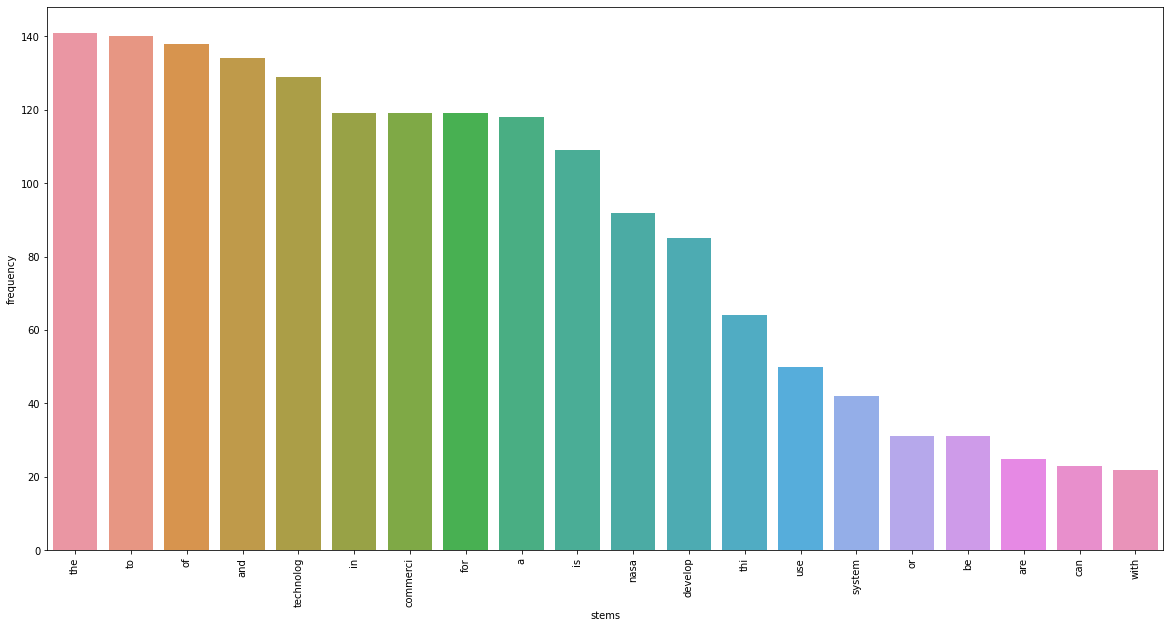

In [17]:
plot_stem_frequency(tf_top_stems, p)

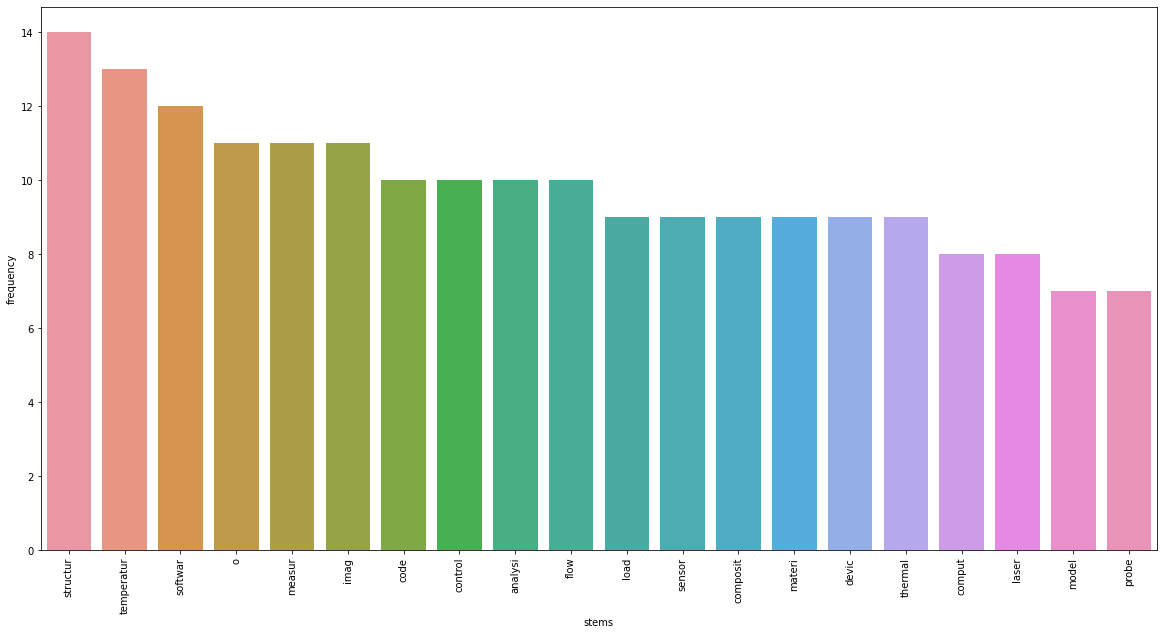

In [18]:
plot_stem_frequency(tfidf_top_stems, p)

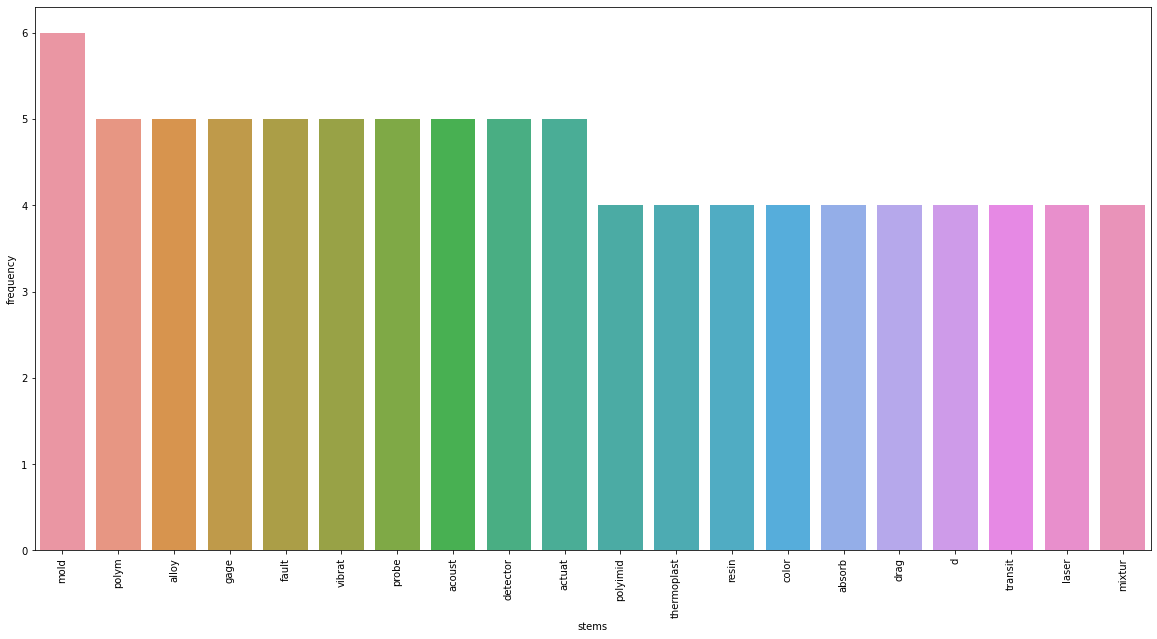

In [19]:
plot_stem_frequency(bm25_top_stems, p)